## Import Packages/Library

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

## Load Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AmandaRiyas/Model-Prediksi-Harga-Saham/refs/heads/main/Data/Data_Saham_BMRI_Clean.csv')
data.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,1693.061401,1696.971474,1681.331184,1685.241256,84546800
1,2015-01-05,1689.151123,1696.971267,1681.330979,1696.971267,33363200
2,2015-01-06,1677.421021,1693.061310,1669.600876,1681.331093,58600000
3,2015-01-07,1696.971436,1696.971436,1677.421073,1681.331146,50244400
4,2015-01-08,1712.611694,1716.521767,1700.881477,1704.791550,63649600


In [3]:
data.tail()

,Date,Close,High,Low,Open,Volume
2402,2024-12-20,5054.151367,5120.946319,5009.621399,5054.151367,148568600
2403,2024-12-23,5187.741211,5232.271178,5098.681276,5165.476227,82910100
2404,2024-12-24,5120.946289,5232.271208,5120.946289,5187.741241,41240900
2405,2024-12-27,5165.476562,5210.006533,5120.946592,5120.946592,46126800
2406,2024-12-30,5076.416504,5120.946473,5031.886535,5054.151519,96782100


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2407 non-null   object 
 1   Close   2407 non-null   float64
 2   High    2407 non-null   float64
 3   Low     2407 non-null   float64
 4   Open    2407 non-null   float64
 5   Volume  2407 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.0+ KB


## Preprocessing data

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2407 non-null   datetime64[ns]
 1   Close   2407 non-null   float64       
 2   High    2407 non-null   float64       
 3   Low     2407 non-null   float64       
 4   Open    2407 non-null   float64       
 5   Volume  2407 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 113.0 KB


## Uji Augmented Dickey-Fuller (ADF)

In [10]:
def adf_test(series, nama_variabel):
    result = adfuller(series.dropna(), autolag='AIC')

    print(f"Uji Augmented Dickey-Fuller (ADF) untuk {nama_variabel}")
    print("-" * 50)
    print(f"ADF Statistic : {result[0]:.6f}")
    print(f"p-value       : {result[1]:.6f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key} : {value:.6f}")

    if result[1] <= 0.05:
        print("Kesimpulan    : Data STASIONER (tolak H0)")
    else:
        print("Kesimpulan    : Data TIDAK STASIONER (gagal tolak H0)")

In [11]:
adf_test(data['Close'], "Harga Penutupan (Close)")

Uji Augmented Dickey-Fuller (ADF) untuk Harga Penutupan (Close)
--------------------------------------------------
ADF Statistic : -0.414723
p-value       : 0.907611
Critical Values:
   1% : -3.433078
   5% : -2.862745
   10% : -2.567411
Kesimpulan    : Data TIDAK STASIONER (gagal tolak H0)


- Karena data tidak stasioner maka uji AR, MA, dan ARMA tidak dapat dilakukan

## Differencing

In [12]:
data['Close_diff'] = data['Close'].diff()

In [13]:
data.head()

,Date,Close,High,Low,Open,Volume,Close_diff
0,2015-01-02,1693.061401,1696.971474,1681.331184,1685.241256,84546800,NaN
1,2015-01-05,1689.151123,1696.971267,1681.330979,1696.971267,33363200,-3.910278
2,2015-01-06,1677.421021,1693.061310,1669.600876,1681.331093,58600000,-11.730103
3,2015-01-07,1696.971436,1696.971436,1677.421073,1681.331146,50244400,19.550415
4,2015-01-08,1712.611694,1716.521767,1700.881477,1704.791550,63649600,15.640259


## Uji Augmented Dickey-Fuller (ADF)

In [16]:
adf_test(data['Close_diff'], "Differencing Pertama Close")

Uji Augmented Dickey-Fuller (ADF) untuk Differencing Pertama Close
--------------------------------------------------
ADF Statistic : -20.941300
p-value       : 0.000000
Critical Values:
   1% : -3.433078
   5% : -2.862745
   10% : -2.567411
Kesimpulan    : Data STASIONER (tolak H0)


## Plot ACF

<Figure size 1000x400 with 0 Axes>

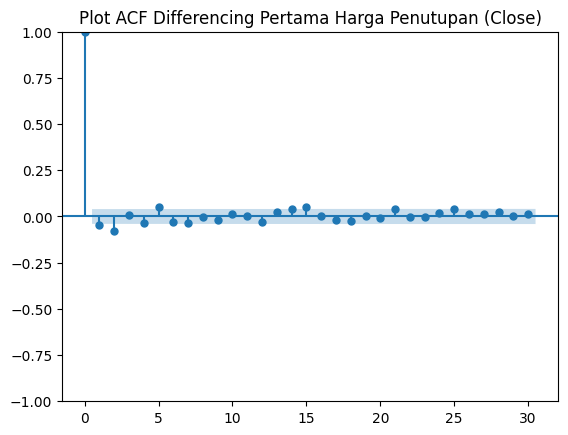

In [17]:
plt.figure(figsize=(10, 4))
plot_acf(data['Close_diff'].dropna(), lags=30)
plt.title("Plot ACF Differencing Pertama Harga Penutupan (Close)")
plt.show()

- Diperoleh q = 0

## Plot PACF

<Figure size 1000x400 with 0 Axes>

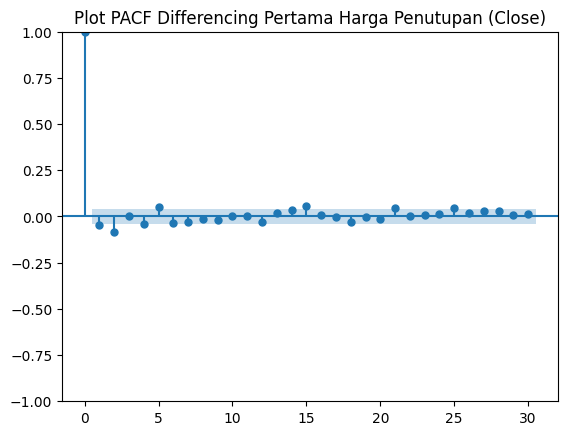

In [18]:
plt.figure(figsize=(10, 4))
plot_pacf(data['Close_diff'].dropna(), lags=30, method='ywm')
plt.title("Plot PACF Differencing Pertama Harga Penutupan (Close)")
plt.show()

- Diperoleh p = 0

Kesimpulan:
- Diperoleh kandidat utama ARIMA(0,1,0)

## Model ARIMA

In [20]:
y = data['Close']

In [22]:
model = ARIMA(y, order=(0, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2407
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -13192.588
Date:                Tue, 06 Jan 2026   AIC                          26387.177
Time:                        05:08:44   BIC                          26392.963
Sample:                             0   HQIC                         26389.281
                               - 2407                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3388.4062     48.639     69.665      0.000    3293.076    3483.737
Ljung-Box (L1) (Q):                   4.56   Jarque-Bera (JB):              3788.25
Prob(Q):                              0.03   Pr

In [23]:
data['fitted'] = model_fit.fittedvalues

## Prediksi Harga Saham 30 Hari Kedepan

In [25]:
forecast = model_fit.forecast(steps=30)
print(forecast)

2407    5076.416504
2408    5076.416504
2409    5076.416504
2410    5076.416504
2411    5076.416504
2412    5076.416504
2413    5076.416504
2414    5076.416504
2415    5076.416504
2416    5076.416504
2417    5076.416504
2418    5076.416504
2419    5076.416504
2420    5076.416504
2421    5076.416504
2422    5076.416504
2423    5076.416504
2424    5076.416504
2425    5076.416504
2426    5076.416504
2427    5076.416504
2428    5076.416504
2429    5076.416504
2430    5076.416504
2431    5076.416504
2432    5076.416504
2433    5076.416504
2434    5076.416504
2435    5076.416504
2436    5076.416504
Name: predicted_mean, dtype: float64


**Kesimpulan Akhir:**
Model AR, MA, dan ARMA tidak dapat digunakan untuk memprediksi harga saham karena data yang ada tidak stasioner. Setelah dilakukan proses differencing, model ARIMA yang merupakan model time series untuk data tidak stasioner menghasilkan prediksi konstan yang merepresentasikan karakter random walk pada data harga saham, sehingga kurang mampu menangkap dinamika nonlinear dan pola kompleks pada data harga saham. Oleh karena itu, diperlukan model yang dapat memodelkan hubungan nonlinear dan dependensi jangka panjang tanpa mensyaratkan stasioneritas data, seperti model Long Short-Term Memory (LSTM) da Gated Recurrent Unit (GRU), untuk membuat prediksi harga saham yang lebih representatif.